In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sts
import statsmodels.stats as stm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [13]:
permcrop5_df = pd.read_csv('../CSVs/Permanent_Crop_NUTS5_2019.csv', sep=",")
tempcrop5_df = pd.read_csv('../CSVs/Temporary_Crop_NUTS5_2019.csv', sep=",")
education5_df = pd.read_csv('../CSVs/Education_NUTS5_2019.csv', sep=",")
labour5_df = pd.read_csv('../CSVs/Labour_NUTS5_2019.csv', sep=",")
prod5_df = pd.read_csv('../CSVs/Production_NUTS5_2019.csv', sep=",")

In [14]:
permcrop5_df.head()

,NutsID,region_name,NUTS_level,pc.year,pc.area,pcn.crop_name
0,111160101,Aboim das Choças,5,2019,13,Total
1,111160101,Aboim das Choças,5,2019,0,Fresh fruit plantations (excluding citrus plan...
2,111160101,Aboim das Choças,5,2019,0,Citrus plantations
3,111160101,Aboim das Choças,5,2019,0,Fruit plantations (subtropical climate zones)
4,111160101,Aboim das Choças,5,2019,0,Nuts plantations


In [15]:
prod5_df.head()

,NutsID,region_name,NUTS_level,p.year,p.value_eur,p.area_ha
0,111160101,Aboim das Choças,5,2019,101072,1921.9
1,111160102,Aguiã,5,2019,156561,1642.8
2,111160104,Ázere,5,2019,140132,2428.6
3,111160105,Cabana Maior,5,2019,189450,152.7
4,111160106,Cabreiro,5,2019,612235,221.4


In [16]:
all_dfs = [permcrop5_df, tempcrop5_df, education5_df, labour5_df, prod5_df]

def map_value(value):
    digits = str(value)[:2]
    if digits == '11':
        return 'Norte'
    elif digits == '15':
        return 'Algarve'
    elif digits == '16':
        return 'Centro'
    elif digits == '17':
        return 'Lisboa'
    elif digits == '18':
        return 'Alentejo'
    elif digits == '20':
        return 'Açores'
    elif digits == '30':
        return 'Madeira'
    else:
        return '-'

for df in all_dfs:
    df['NUTS2_region'] = df['NutsID'].apply(map_value)
    print(df['NUTS2_region'].unique())

['Norte' 'Algarve' 'Centro' 'Lisboa' 'Alentejo' 'Açores' 'Madeira']
['Norte' 'Algarve' 'Centro' 'Lisboa' 'Alentejo' 'Açores' 'Madeira']
['Norte' 'Algarve' 'Centro' 'Lisboa' 'Alentejo' 'Açores' 'Madeira']
['Norte' 'Centro' 'Lisboa' 'Alentejo' 'Algarve' 'Açores' 'Madeira']
['Norte' 'Algarve' 'Centro' 'Lisboa' 'Alentejo' 'Açores' 'Madeira']


In [17]:
education5_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15460 entries, 0 to 15459
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   NutsID              15460 non-null  object
 1   region_name         15460 non-null  object
 2   NUTS_level          15460 non-null  int64 
 3   e.year              15460 non-null  int64 
 4   e.value             15460 non-null  int64 
 5   el.education_level  12368 non-null  object
 6   NUTS2_region        15460 non-null  object
dtypes: int64(3), object(4)
memory usage: 845.6+ KB


In [18]:
prod5_df['NUTS2_region'].unique()

array(['Norte', 'Algarve', 'Centro', 'Lisboa', 'Alentejo', 'Açores',
       'Madeira'], dtype=object)

# Education

In [19]:
education5_df.head()

,NutsID,region_name,NUTS_level,e.year,e.value,el.education_level,NUTS2_region
0,111160101,Aboim das Choças,5,2019,94,Total,Norte
1,111160102,Aguiã,5,2019,99,Total,Norte
2,111160104,Ázere,5,2019,68,Total,Norte
3,111160105,Cabana Maior,5,2019,63,Total,Norte
4,111160106,Cabreiro,5,2019,204,Total,Norte


In [20]:
education5_df['el.education_level'].fillna('None', inplace=True)

In [21]:
ed_no_totals = education5_df[education5_df['el.education_level'] != 'Total'].copy()
ed_totals = education5_df[education5_df['el.education_level'] == 'Total'].copy()

In [22]:
ed_totals.head()

,NutsID,region_name,NUTS_level,e.year,e.value,el.education_level,NUTS2_region
0,111160101,Aboim das Choças,5,2019,94,Total,Norte
1,111160102,Aguiã,5,2019,99,Total,Norte
2,111160104,Ázere,5,2019,68,Total,Norte
3,111160105,Cabana Maior,5,2019,63,Total,Norte
4,111160106,Cabreiro,5,2019,204,Total,Norte


In [23]:
def ed_percentage(row):
    id = row['NutsID']
    value = row['e.value']
    total = ed_totals[ed_totals['NutsID'] == id]['e.value'].values[0]
    if total == 0:
        return 0
    else:
        return (value / total) * 100

In [24]:
ed_no_totals.loc[:, 'ed_level_perc'] = ed_no_totals.apply(ed_percentage, axis=1)

In [25]:
ed_no_totals['ed_level_perc'].describe()

count    12368.000000
mean        24.773609
std         23.136377
min          0.000000
25%          9.375000
50%         14.252059
75%         35.015392
max        100.000000
Name: ed_level_perc, dtype: float64

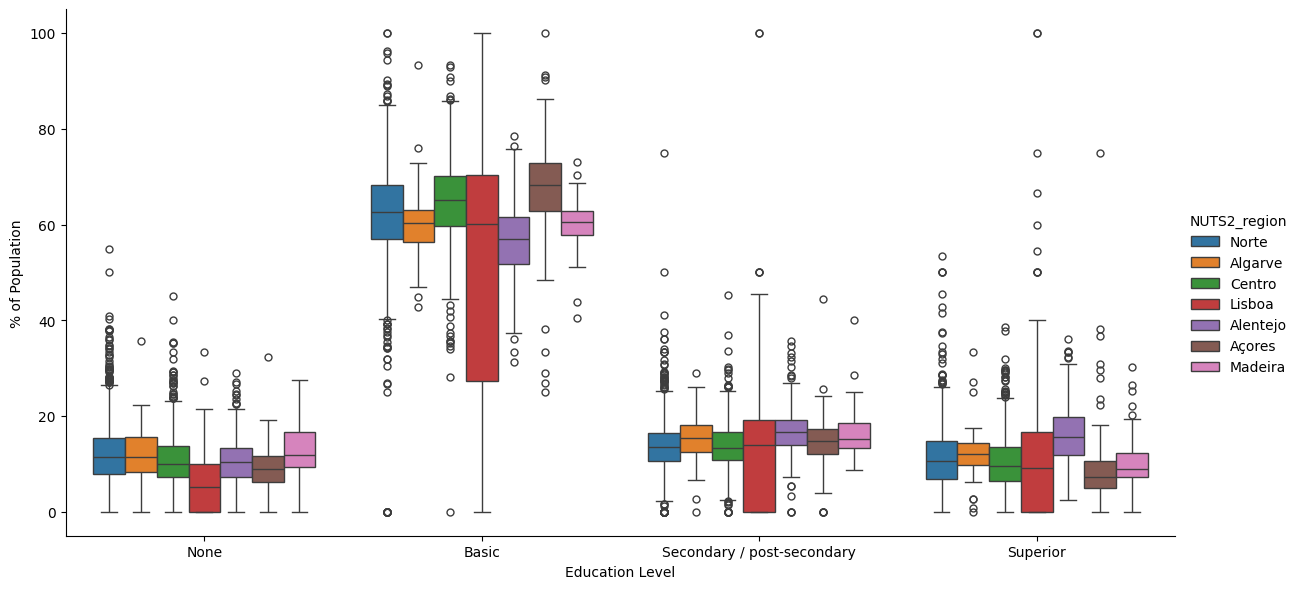

In [26]:
sns.catplot(
    data=ed_no_totals,
    x="el.education_level",
    y="ed_level_perc",
    hue="NUTS2_region",
    kind="box",
    height=6,
    aspect=2
)
plt.xlabel('Education Level')
plt.ylabel('% of Population')
plt.show()